<a href="https://colab.research.google.com/github/cutemfc/Computer-Vision-Project/blob/main/DA111_3_Project_Computer_Vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal : Multiclass Classification of CIFAR-10


*   Dataset: CIFAR-10, consists of 60000 32x32 colour images
*   Class:10 (completely mutually exclusive)
*   Training 10,000 images and 10,000 test images
*   Training Model: Create tailed Head and use ResNet50 (CNN) as the base model (applying transfer learning)
*   Experiments: improving Accuracy and Mitigating Overfitting
To enhance model performance, various strategies were employed:


1.   Increase dropout numbers
2.   Tune regulatorization weight
3.   Fine Tuning the unfreeze layers and train more layers


*   Visualization accuracy and loss
*   Evaluation the model












# Step 1: Import the Necessary Libraries

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix


#Step 2. Load, Limit the Dataset, and EDA analysis

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels),(test_images, test_labels)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Limit the data to 10000
n=10000
train_images=train_images[:n]  #[10000:20000]
train_labels=train_labels[:n]

test_images=test_images[:n]
test_labels=test_labels[:n]

In [ ]:
# Visualize samples from the dataset
train_labels[3]

array([4], dtype=uint8)

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [1],
       [1],
       [5]], dtype=uint8)

In [ ]:
# Check the numbers of photos per class
array=train_labels.flatten()
pd.Series(array).value_counts()

,count
2,1032
6,1030
8,1025
3,1016
0,1005
7,1001
4,999
9,981
1,974
5,937


The numbers of each class looks balance.

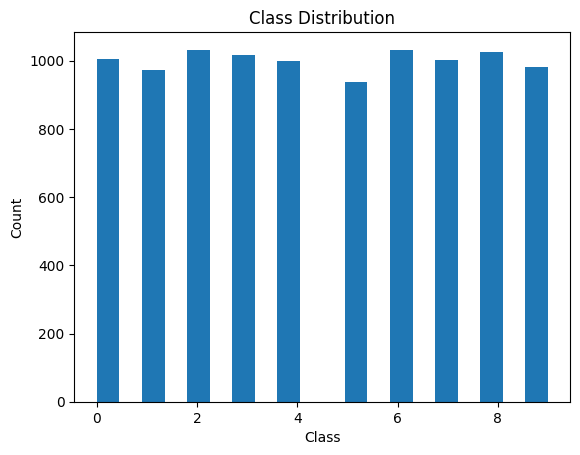

In [ ]:
# Plot the counts of classfications
plt.hist(array, bins=20)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## Labels each training and test example is assigned to one of the following labels as shown below:


*   0 airplane
*   1 automobile
*   2 bird
*   3 cat
*   4 deer
*   5 dog
*   6 frog
*   7 horse
*   8 ship
*   9 truck


In [ ]:
train_labels[3]

array([4], dtype=uint8)

In [ ]:
int(train_labels[3])

<ipython-input-9-fa527291e3ae>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(train_labels[3])


4

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]], dtype=uint8)
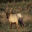

In [ ]:
train_images[3]

In [ ]:
train_labels[5]

array([1], dtype=uint8)

Label: 100 Name:ship


<ipython-input-12-a4756880303a>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=int(train_labels[i])


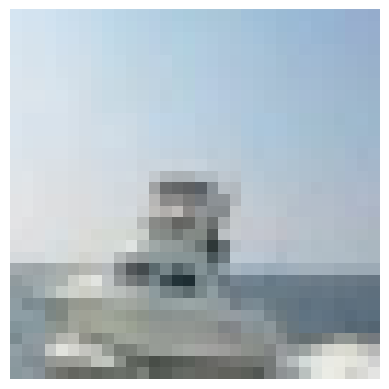

In [ ]:
i=100
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
image=train_images[i]
label=int(train_labels[i])
print(f'Label: {i}',f'Name:{class_names[label]}')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
def show_cifar10_image(i, images, labels):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    image = images[i]
    label = int(labels[i])

    print(f'Index: {i}', f'Label: {label}', f'Name: {class_names[label]}')

    plt.imshow(image)
    plt.axis('off')
    plt.show()


Index: 0 Label: 6 Name: frog


<ipython-input-13-96f46524b35a>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(labels[i])


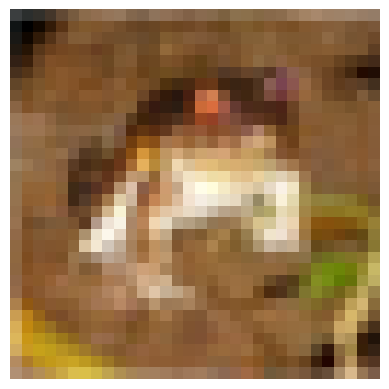

In [ ]:
show_cifar10_image(0, train_images, train_labels)

<ipython-input-15-15d5f8148d9b>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(train_labels[i])


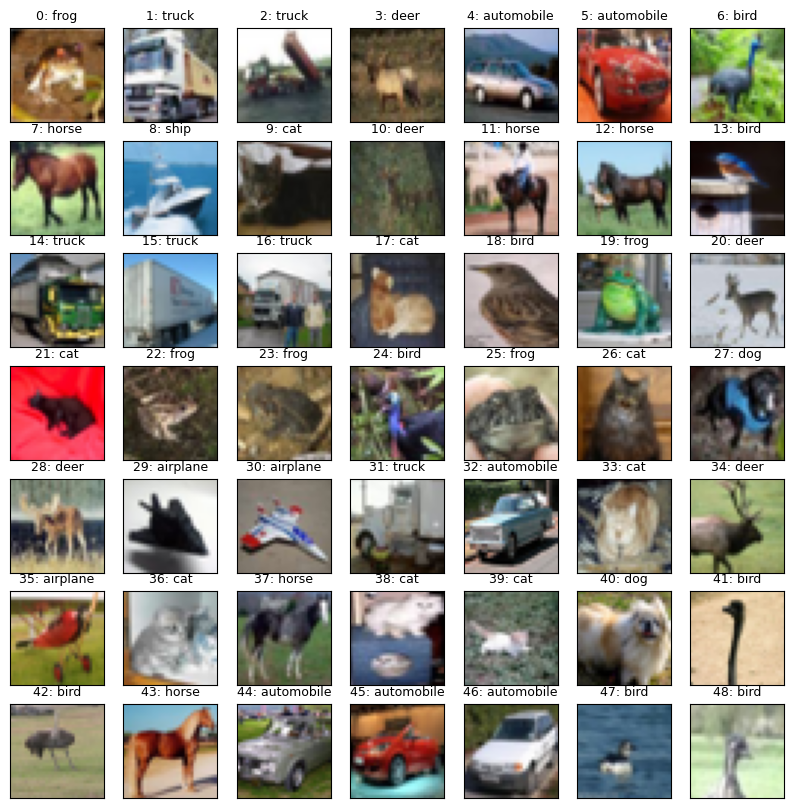

In [ ]:
# Visualization
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    label_index = int(train_labels[i])
    plt.title(f"{i}: {class_names[label_index]}", fontsize=9)
plt.show()

the color does not change. GBR has converted to RGB

In [ ]:
train_images.shape


(10000, 32, 32, 3)

Pixel 32x 32 and 3D(colorful picture)

# Step 3: Preprocessing the data

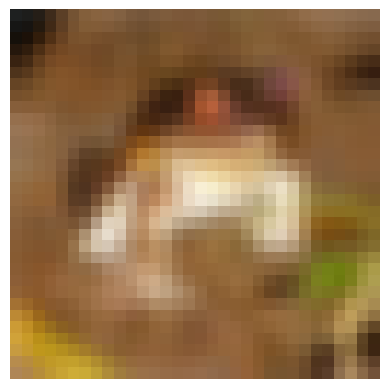

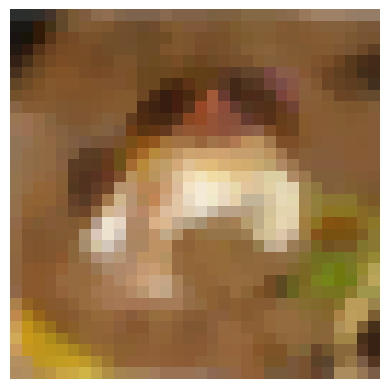

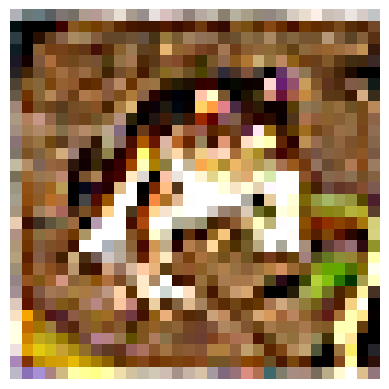

In [ ]:
# apply for gaussian filter to enhance the edges and reduce the noise
plt.imshow(cv2.GaussianBlur(train_images[0],(3,3),0)) # each pixel is average by surrounded 3 x 3, 0 is std
plt.axis('off')
plt.show()

# apply median filter to reduce the salt and pepper noise
plt.imshow(cv2.medianBlur(train_images[0],3))
plt.axis('off')
plt.show()

# apply sharpening filter to enhance the clarity
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
plt.imshow(cv2.filter2D(src=train_images[0],ddepth=-1, kernel=kernel))
plt.axis('off')
plt.show()

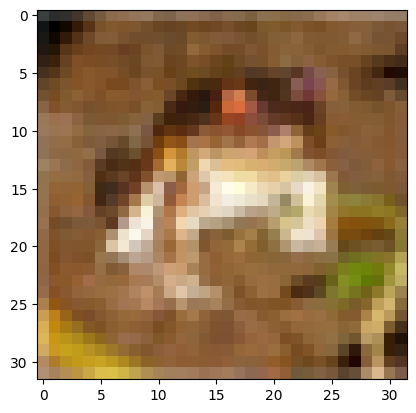

In [ ]:
# Display the initial image and apply for sharpen image
plt.imshow(train_images[0])
plt.show()


In [ ]:
# Decide using the sharpening filter applying to images
kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

train_images_sharpen= np.array([cv2.filter2D(src=image, ddepth=-1, kernel=kernel) for image in train_images])
test_images_sharpen= np.array([cv2.filter2D (src=image, ddepth=-1, kernel=kernel) for image in test_images])


In [ ]:
# print the final shape
print(train_images_sharpen.shape)

(10000, 32, 32, 3)


In [ ]:
print(test_images_sharpen.shape)

(10000, 32, 32, 3)


<ipython-input-22-e9cfaf86bf0e>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(train_labels[i])


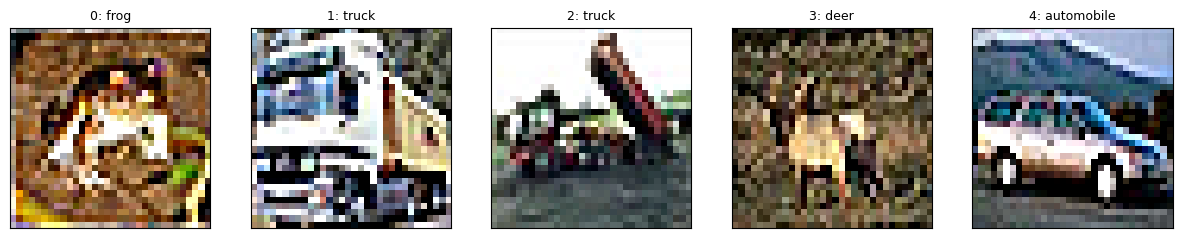

In [ ]:
# Display the the 5 pictures of train image
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_sharpen[i])
    label_index = int(train_labels[i])
    plt.title(f"{i}: {class_names[label_index]}", fontsize=9)
plt.show()


# The Dataset for ResNet50 Model Training

1.   RGB automatically convert to BGR
2.   Zero Centering (automatically reduce the mean of R/G/B)
3.   Using preprocess_input() don't need further normalization(don't need to divide 255)


In [ ]:
# Preprocess the data for training model
train_images_preprocess=preprocess_input(train_images_sharpen)
test_images_preprocess=preprocess_input(test_images_sharpen)
train_images_preprocess=train_images_preprocess.astype('float32')
test_images_preprocess=test_images_preprocess.astype('float32')

# Step 4. Load the model for the Training

In [ ]:
# Load NesNet 50
num_classes=10
image_shape=(32, 32, 3)
base_model=ResNet50(include_top=False, weights='imagenet', input_shape=image_shape,
        classifier_activation ='softmax',
        name='resnet50')
# Freeze the base_model
base_model.trainable=False

# Step 5. Building the Custom Top layer


In [ ]:
# Create a custom top layer+regularizers
from tensorflow.keras import layers, models, regularizers

# Create a custom top layer with L2 regularization
model = models.Sequential([
    base_model,
    # Converts the feature maps into a single vector
    layers.GlobalAveragePooling2D(),
    # Add a fully connected layer with 256 neurons and L2 regularization
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Add a fully connected layer with 128 neurons and L2 regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.002)), layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.002)), layers.BatchNormalization(),
    # Drop 50% neurons to prevent overfitting
    layers.Dropout(0.5),
    # Final layer with 10 outputs for 10 classes
    layers.Dense(10, activation='softmax')
])

# Step 6: Compile the Model

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # sparse_categorical_crossentropy is for the interger classification

In [ ]:
# Show summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,154,826 (92.14 MB)

 Trainable params: 566,730 (2.16 MB)

 Non-trainable params: 23,588,096 (89.98 MB)

# Step 7: Training the Custom Model Head


In [ ]:
import os
import tensorflow as tfflow


In [ ]:
# set 10 epochs
epochs=10
history=model.fit(train_images_preprocess, train_labels, epochs=epochs, validation_data=(test_images_preprocess, test_labels))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 272ms/step - accuracy: 0.3569 - loss: 5.8570 - val_accuracy: 0.5724 - val_loss: 2.9545
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 261ms/step - accuracy: 0.5302 - loss: 2.8012 - val_accuracy: 0.5696 - val_loss: 2.1545
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 263ms/step - accuracy: 0.5669 - loss: 2.1142 - val_accuracy: 0.5725 - val_loss: 1.8693
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 261ms/step - accuracy: 0.5955 - loss: 1.8312 - val_accuracy: 0.5975 - val_loss: 1.7296
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 285ms/step - accuracy: 0.6083 - loss: 1.6851 - val_accuracy: 0.5957 - val_loss: 1.6439
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 298ms/step - accuracy: 0.6183 - loss: 1.6152 - val_accuracy: 0.5786 - val_loss: 1.6416
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 287ms/step - accuracy: 0.6093 - loss: 1.5735 - val_accuracy: 0.5817 - val_loss: 1.5870
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 134s 263ms/step - accuracy: 0.6164 - los

# Step 8. Visualization the Loss and Accuracy between Training and Validation data

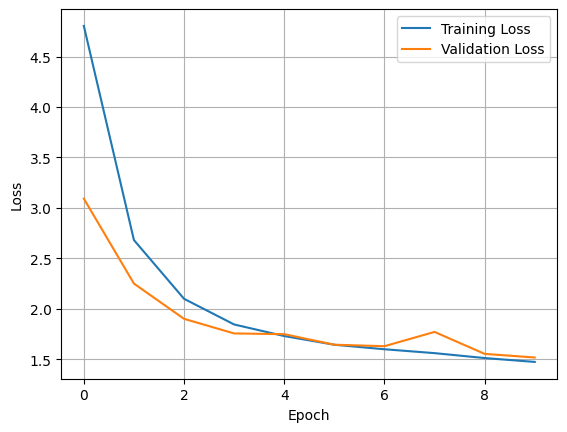

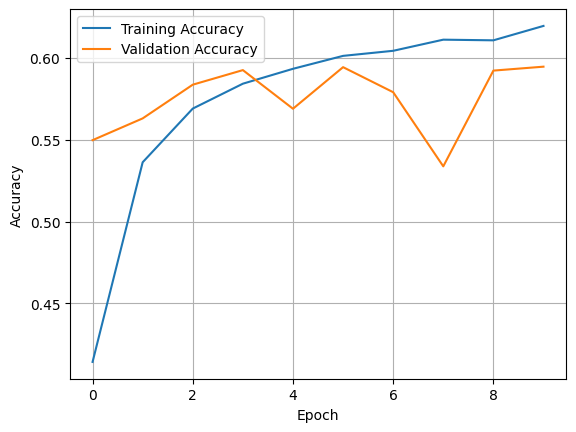

In [ ]:
# Plot the loss and accureacy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Conclusion: when epochs >6 it seems a overfitting

# Step 9. Evaluateing the Model Performance

In [ ]:
# Evaluate the the model performance
test_loss, test_acc=model.evaluate(test_images_preprocess, test_labels)
print(f'Test accuracy:{test_acc*100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.5954 - loss: 1.4670
Test accuracy:59.50%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model.predict(test_images_preprocess)
y_pred=np.argmax(y_pred, axis=1) # convert the probability distribution into class label
print(classification_report(test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step
              precision    recall  f1-score   support

           0       0.54      0.76      0.64      1000
           1       0.67      0.67      0.67      1000
           2       0.48      0.58      0.52      1000
           3       0.49      0.49      0.49      1000
           4       0.57      0.49      0.52      1000
           5       0.69      0.42      0.52      1000
           6       0.65      0.67      0.66      1000
           7       0.57      0.70      0.63      1000
           8       0.75      0.58      0.65      1000
           9       0.66      0.59      0.62      1000

    accuracy                           0.59     10000
   macro avg       0.61      0.59      0.59     10000
weighted avg       0.61      0.59      0.59     10000



**Conclusion**: Class 8 (ship) achieved the best performance with the highest precision, recall, and F1-score (F1 = 0.70), while class 3 (cat) had the poorest performance, with the lowest F1-score of 0.47.

# Step 10: Optimization and further improvement


*   tuning L2 regularization
*   applying early stopping


*   avoid overfitting (increase dropout numbers)








## Increase dropouts

In [ ]:
# Increase dropout times
# Create a custom top layer with L2 regularization
model_r1 = models.Sequential([
    base_model,
    # Converts the feature maps into a single vector
    layers.GlobalAveragePooling2D(),
    # Add a fully connected layer with 256 neurons and L2 regularization
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    # Add a fully connected layer with 128 neurons and L2 regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.002)), layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.002)), layers.BatchNormalization(),
    # Drop 50% neurons to prevent overfitting
    layers.Dropout(0.3),
    # Final layer with 10 outputs for 10 classes
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model_r1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # sparse_categorical_crossentropy is for the interger classification

In [ ]:
epochs=10
history_r1=model_r1.fit(train_images_preprocess, train_labels, epochs=epochs, validation_data=(test_images_preprocess, test_labels))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 164s 484ms/step - accuracy: 0.2699 - loss: 5.7812 - val_accuracy: 0.5350 - val_loss: 2.9386
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 181s 417ms/step - accuracy: 0.4719 - loss: 2.9275 - val_accuracy: 0.5809 - val_loss: 2.1971
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 150s 479ms/step - accuracy: 0.5162 - loss: 2.3066 - val_accuracy: 0.5711 - val_loss: 1.9758
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 422ms/step - accuracy: 0.5367 - loss: 2.0618 - val_accuracy: 0.5931 - val_loss: 1.8329
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 426ms/step - accuracy: 0.5398 - loss: 1.9458 - val_accuracy: 0.5828 - val_loss: 1.7926
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 159s 479ms/step - accuracy: 0.5560 - loss: 1.8484 - val_accuracy: 0.5897 - val_loss: 1.7176
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 188s 433ms/step - accuracy: 0.5556 - loss: 1.8272 - val_accuracy: 0.5891 - val_loss: 1.6801
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 131s 421ms/step - accuracy: 0.5630 -

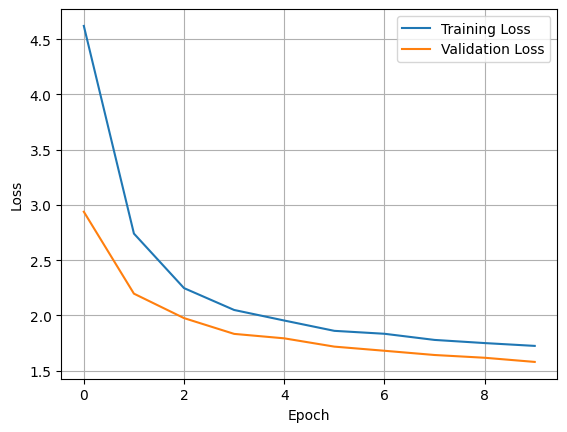

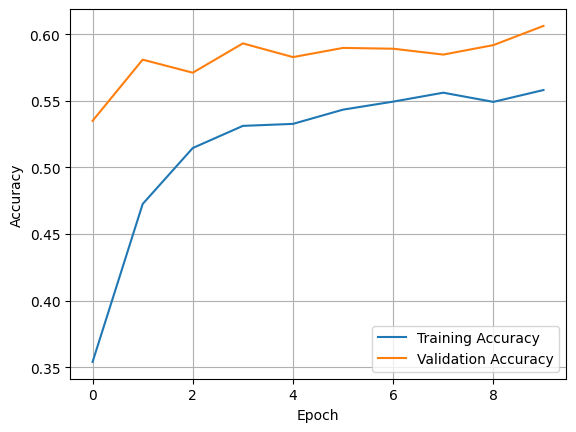

In [ ]:
# Plot the loss and accureacy
plt.plot(history_r1.history['loss'], label='Training Loss')
plt.plot(history_r1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(history_r1.history['accuracy'], label='Training Accuracy')
plt.plot(history_r1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## conclusion: The model seems better and not over -fitting

In [ ]:
# Evaluate the the model performance
test_loss, test_acc=model_r1.evaluate(test_images_preprocess, test_labels)
print(f'Test accuracy:{test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.6077 - loss: 1.5799
Test accuracy:60.62%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model_r1.predict(test_images_preprocess)
y_pred=np.argmax(y_pred, axis=1) # convert the probability distribution into class label
print(classification_report(test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 153ms/step
              precision    recall  f1-score   support

           0       0.68      0.61      0.64      1000
           1       0.66      0.65      0.66      1000
           2       0.58      0.47      0.52      1000
           3       0.45      0.50      0.47      1000
           4       0.56      0.57      0.56      1000
           5       0.66      0.50      0.57      1000
           6       0.59      0.77      0.67      1000
           7       0.63      0.64      0.63      1000
           8       0.73      0.65      0.68      1000
           9       0.58      0.72      0.64      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.60     10000
weighted avg       0.61      0.61      0.60     10000



### Tune L2 Regularization

In [ ]:
# tune  L2 regularization
# Create a custom top layer with L2 regularization
model_r2 = models.Sequential([
    base_model,
    # Converts the feature maps into a single vector
    layers.GlobalAveragePooling2D(),
    # Add a fully connected layer with 256 neurons and L2 regularization
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Add a fully connected layer with 128 neurons and L2 regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)), layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.002)), layers.BatchNormalization(),
    # Drop 50% neurons to prevent overfitting
    layers.Dropout(0.5),
    # Final layer with 10 outputs for 10 classes
    layers.Dense(10, activation='softmax')
])

In [ ]:
model_r2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # sparse_categorical_crossentropy is for the interger classification

In [ ]:
epochs=10
history_r2=model_r2.fit(train_images_preprocess, train_labels, epochs=epochs, validation_data=(test_images_preprocess, test_labels))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 431ms/step - accuracy: 0.3831 - loss: 6.1228 - val_accuracy: 0.5515 - val_loss: 3.1590
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 422ms/step - accuracy: 0.5670 - loss: 2.8583 - val_accuracy: 0.5854 - val_loss: 2.1777
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 422ms/step - accuracy: 0.5930 - loss: 2.0871 - val_accuracy: 0.5872 - val_loss: 1.8806
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 414ms/step - accuracy: 0.6125 - loss: 1.7718 - val_accuracy: 0.5857 - val_loss: 1.7489
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 302ms/step - accuracy: 0.6169 - loss: 1.6290 - val_accuracy: 0.5819 - val_loss: 1.6590
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 92s 296ms/step - accuracy: 0.6174 - loss: 1.5390 - val_accuracy: 0.5826 - val_loss: 1.6074
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 307ms/step - accuracy: 0.6326 - loss: 1.4799 - val_accuracy: 0.5894 - val_loss: 1.5527
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 178s 423ms/step - accuracy: 0.6433 - 

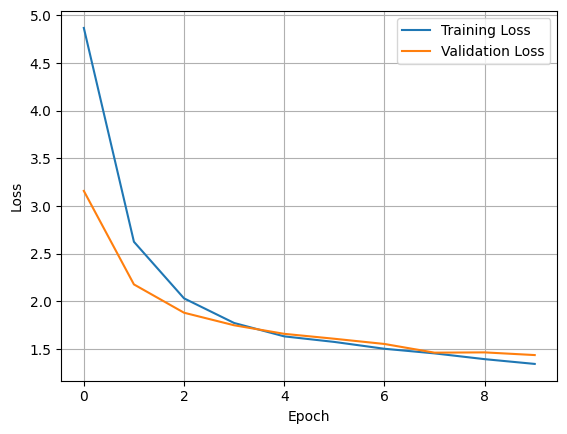

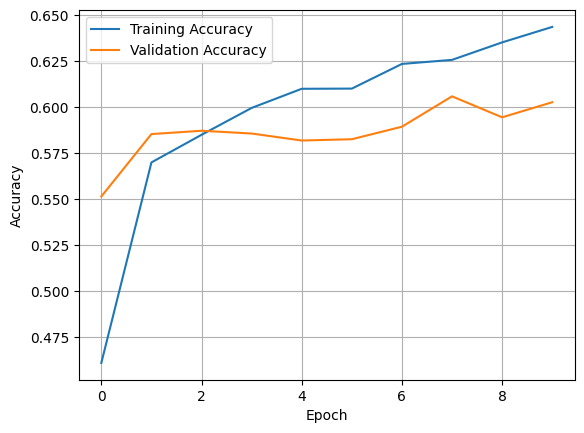

In [ ]:
# Plot the loss and accureacy
plt.plot(history_r2.history['loss'], label='Training Loss')
plt.plot(history_r2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(history_r2.history['accuracy'], label='Training Accuracy')
plt.plot(history_r2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Evaluate the the model performance
test_loss, test_acc=model_r2.evaluate(test_images_preprocess, test_labels)
print(f'Test accuracy:{test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 209ms/step - accuracy: 0.5977 - loss: 1.4497
Test accuracy:59.57%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model_r2.predict(test_images_preprocess)
y_pred=np.argmax(y_pred, axis=1) # convert the probability distribution into class label
print(classification_report(test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 150ms/step
              precision    recall  f1-score   support

           0       0.77      0.50      0.61      1000
           1       0.73      0.58      0.65      1000
           2       0.52      0.53      0.52      1000
           3       0.51      0.41      0.46      1000
           4       0.58      0.54      0.56      1000
           5       0.66      0.50      0.57      1000
           6       0.52      0.84      0.64      1000
           7       0.56      0.65      0.60      1000
           8       0.78      0.60      0.68      1000
           9       0.54      0.81      0.64      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.59     10000
weighted avg       0.62      0.60      0.59     10000



# It only shows a slightly improvemnet compared with the original modeling.

# Try to unfreeze the layers and apply the twice dropouts

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-100]: # unfreeze the last 100 layers, the total layers is 175
    layer.trainable = False

In [ ]:
model_r3 = models.Sequential([
    base_model,
    # Converts the feature maps into a single vector
    layers.GlobalAveragePooling2D(),
    # Add a fully connected layer with 256 neurons and L2 regularization
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    # Add a fully connected layer with 128 neurons and L2 regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)), layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.002)), layers.BatchNormalization(),
    # Drop 50% neurons to prevent overfitting
    layers.Dropout(0.3),
    # Final layer with 10 outputs for 10 classes
    layers.Dense(10, activation='softmax')
])

In [ ]:
model_r3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callbacks=[EarlyStopping(patient=5, restore_best_weights=True), ReduecLRonPlateau(patience=3, factor=0.5, min_lr=1e-6)]

In [ ]:
epochs=10
history_r3=model_r3.fit(train_images_preprocess, train_labels, epochs=epochs, validation_data=(test_images_preprocess, test_labels))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 641s 2s/step - accuracy: 0.2163 - loss: 7.0016 - val_accuracy: 0.4652 - val_loss: 4.4267
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 644s 2s/step - accuracy: 0.5123 - loss: 3.2529 - val_accuracy: 0.6147 - val_loss: 2.3635
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 603s 2s/step - accuracy: 0.6274 - loss: 2.0403 - val_accuracy: 0.6098 - val_loss: 2.2399
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.6693 - loss: 1.6041 - val_accuracy: 0.5420 - val_loss: 4.1466
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 654s 2s/step - accuracy: 0.6815 - loss: 1.4666 - val_accuracy: 0.6853 - val_loss: 1.4085
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.7196 - loss: 1.2633 - val_accuracy: 0.6249 - val_loss: 1.5629
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 643s 2s/step - accuracy: 0.7162 - loss: 1.2726 - val_accuracy: 0.6631 - val_loss: 1.3652
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 622s 2s/step - accuracy: 0.7548 - loss: 1.0918 - val_accu

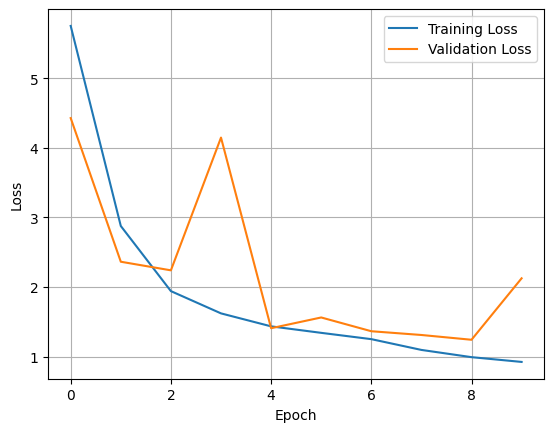

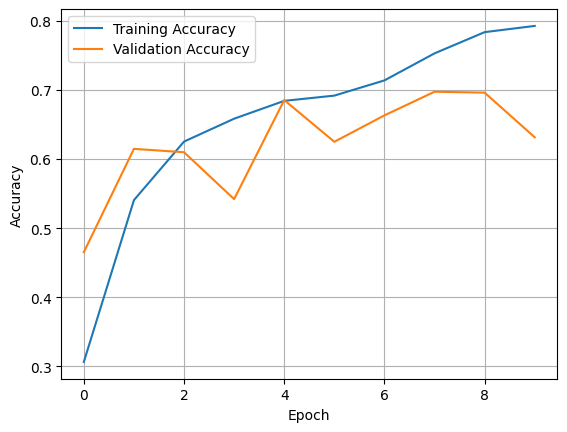

In [ ]:
# Plot the loss and accureacy
plt.plot(history_r3.history['loss'], label='Training Loss')
plt.plot(history_r3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(history_r3.history['accuracy'], label='Training Accuracy')
plt.plot(history_r3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Evaluate the the model performance
test_loss, test_acc=model_r3.evaluate(test_images_preprocess, test_labels)
print(f'Test accuracy:{test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.6367 - loss: 2.1076
Test accuracy:63.14%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model_r3.predict(test_images_preprocess)
y_pred=np.argmax(y_pred, axis=1) # convert the probability distribution into class label
print(classification_report(test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 166ms/step
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.73      0.85      0.79      1000
           2       0.71      0.36      0.48      1000
           3       0.41      0.58      0.48      1000
           4       0.69      0.34      0.46      1000
           5       0.61      0.43      0.51      1000
           6       0.52      0.89      0.66      1000
           7       0.54      0.72      0.62      1000
           8       0.83      0.72      0.77      1000
           9       0.87      0.66      0.75      1000

    accuracy                           0.63     10000
   macro avg       0.66      0.63      0.62     10000
weighted avg       0.66      0.63      0.62     10000



### **Conclusion:** Unfreezing the last 100 layers of the ResNet50 base model led to an improvement in accuracy (from 59.50% to 63.14%) compared to the original frozen model. However, the accuracy and loss curves still showed noticeable fluctuations during training. To address this instability, we attempted to reduce the learning rate to allow for more gradual and stable optimization

# Reduce the learning rate to 1e-5

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-100]: # unfreeze the last 100 layers, the total layers is 175
    layer.trainable = False

In [ ]:
model_r4 = models.Sequential([
    base_model,
    # Converts the feature maps into a single vector
    layers.GlobalAveragePooling2D(),
    # Add a fully connected layer with 256 neurons and L2 regularization
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    # Add a fully connected layer with 128 neurons and L2 regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)), layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.002)), layers.BatchNormalization(),
    # Drop 50% neurons to prevent overfitting
    layers.Dropout(0.3),
    # Final layer with 10 outputs for 10 classes
    layers.Dense(10, activation='softmax')
])

In [ ]:
model_r4.compile(optimizer=Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks=[EarlyStopping(patience=5, restore_best_weights=True), ReduceLROnPlateau(patience=3, factor=0.5, min_lr=1e-6)]

In [ ]:
epochs=10
history_r4=model_r4.fit(train_images_preprocess, train_labels, epochs=epochs, validation_data=(test_images_preprocess, test_labels), callbacks=callbacks)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 642s 2s/step - accuracy: 0.1097 - loss: 8.5820 - val_accuracy: 0.2028 - val_loss: 7.4810 - learning_rate: 1.0000e-05
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 605s 2s/step - accuracy: 0.2156 - loss: 7.6391 - val_accuracy: 0.3719 - val_loss: 6.9193 - learning_rate: 1.0000e-05
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 629s 2s/step - accuracy: 0.3592 - loss: 6.9759 - val_accuracy: 0.4371 - val_loss: 6.5717 - learning_rate: 1.0000e-05
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 0.4721 - loss: 6.4819 - val_accuracy: 0.5199 - val_loss: 6.2187 - learning_rate: 1.0000e-05
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - accuracy: 0.5789 - loss: 6.0413 - val_accuracy: 0.5854 - val_loss: 5.9155 - learning_rate: 1.0000e-05
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.6333 - loss: 5.7630 - val_accuracy: 0.6305 - val_loss: 5.6585 - learning_rate: 1.0000e-05
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - acc

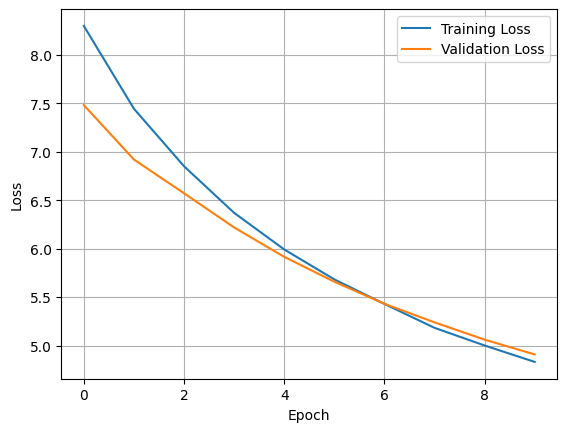

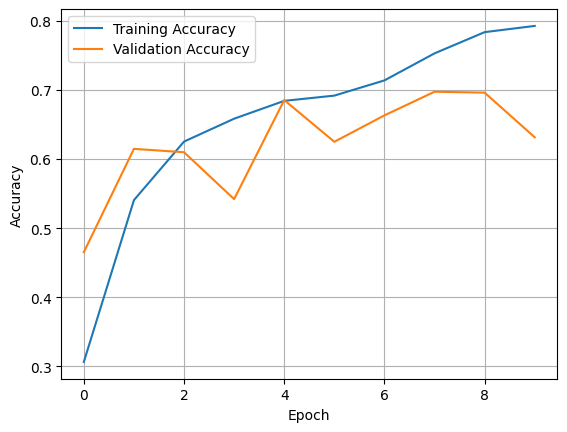

In [ ]:
# Plot the loss and accureacy
plt.plot(history_r4.history['loss'], label='Training Loss')
plt.plot(history_r4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(history_r3.history['accuracy'], label='Training Accuracy')
plt.plot(history_r3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Evaluate the the model performance
test_loss, test_acc=model_r4.evaluate(test_images_preprocess, test_labels)
print(f'Test accuracy:{test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.7111 - loss: 4.9023
Test accuracy:70.80%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=model_r4.predict(test_images_preprocess)
y_pred=np.argmax(y_pred, axis=1) # convert the probability distribution into class label
print(classification_report(test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 132ms/step
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1000
           1       0.87      0.80      0.83      1000
           2       0.71      0.56      0.62      1000
           3       0.45      0.58      0.51      1000
           4       0.72      0.56      0.63      1000
           5       0.63      0.59      0.61      1000
           6       0.74      0.84      0.79      1000
           7       0.70      0.72      0.71      1000
           8       0.74      0.88      0.80      1000
           9       0.80      0.82      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [ ]:
y_pred_train=model_r4.predict(train_images_preprocess)
y_pred_train=np.argmax(y_pred_train, axis=1) # convert the probability distribution into class label
print(classification_report(train_labels, y_pred_train))

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1005
           1       0.98      0.96      0.97       974
           2       0.93      0.81      0.87      1032
           3       0.68      0.77      0.72      1016
           4       0.93      0.80      0.86       999
           5       0.76      0.79      0.77       937
           6       0.89      0.93      0.91      1030
           7       0.84      0.87      0.85      1001
           8       0.92      0.98      0.95      1025
           9       0.96      0.97      0.96       981

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



### When we slow down the learning rate from 1e-3 to 1e-5, the fluction of Loss function has improved, but the accuracy fluctions remain the same. The accuracy of test data improve from 63.14% to 70.8%


  





# Step 11: Overall Conclusion

- Unfreezing the last 100 layers of ResNet50 and combining it with a reduced learning rate (1e-5) significantly improved testing accuracy from 59.50% to 70.8%.
- Increasing dropout layers and adjusting L2 regularization helped mitigate overfitting and stablizing model but did not significantly enhance accuracy (59.50% vs 60.62% vs 59.57% on test data).
- Model 4 shows Class 1 (automobile) performing best with precision: 0.87, recall: 0.80, and F1-score: 0.83, whereas Class 3 (cat) had the weakest performance (precision: 0.45, recall: 0.58, F1-score: 0.51). The model demonstrates strong classification performance for traffic-related objects, with automobiles, ships, and trucks achieving F1 scores above 0.8, indicating high precision and recall. In contrast, animal classes (cats, deer, and dogs) exhibit lower F1 scores (<0.7), suggesting challenges in distinguishing organic features.
-This highlights the model’s higher reliability in structured object recognition compared to complex animal patterns.
This suggests that additional data preprocessing may be needed to improve prediction accuracy, as similar trends appear in the training set.


